# **1.DATA PULL FROM RDS**

In [5]:
from sqlalchemy import create_engine
import pandas as pd

In [6]:
# Database connection details
db_host = "chefmate.c9ou4ceauye1.ap-south-1.rds.amazonaws.com"
db_user = "admin"
db_password = "hWTEFVJwPwC1axSWGlxz"
db_name = "chefmate"
db_port = 3306

In [7]:
# Create the connection string
connection_string = f"mysql+pymysql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"

# Create a SQLAlchemy engine
engine = create_engine(connection_string)


In [8]:
query_1 = "SELECT * FROM Encoded_data_for_ML;"
dataset_1= pd.read_sql(query_1, engine)

In [9]:
dataset_1.to_csv("preprocessed_restaurant_data.csv", index=False)

In [10]:
dataset_1.head()

,restaurant.id,Afghani,African,American,Andhra,Arabian,Argentine,Armenian,Asian,Asian Fusion,...,Teriyaki,Tex-Mex,Thai,Tibetan,Turkish,Turkish Pizza,Vegetarian,Vietnamese,Western,World Cuisine
0,308322.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,18017612.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18313566.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18353121.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18354483.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **2.MODEL TRAINING**

In [11]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt


In [12]:
data = pd.read_csv('preprocessed_restaurant_data.csv')

In [13]:
data.isnull().sum()

restaurant.id    9
Afghani          9
African          9
American         9
Andhra           9
                ..
Turkish Pizza    9
Vegetarian       9
Vietnamese       9
Western          9
World Cuisine    9
Length: 147, dtype: int64

In [14]:
data.dropna(inplace=True)

In [15]:
data.isnull().sum()

restaurant.id    0
Afghani          0
African          0
American         0
Andhra           0
                ..
Turkish Pizza    0
Vegetarian       0
Vietnamese       0
Western          0
World Cuisine    0
Length: 147, dtype: int64

**1.KMeans**

In [16]:
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust clusters as needed
kmeans_labels = kmeans.fit_predict(data)


**2.HIERARCHICAL**

In [17]:
hierarchical = AgglomerativeClustering(n_clusters=4)
hierarchical_labels = hierarchical.fit_predict(data)


**3.GAUSSIAN MIXTURE**

In [18]:
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(data)


**Evaluate Clustering Models**

**1.Silhouette Score**

In [19]:
silhouette_kmeans = silhouette_score(data, kmeans_labels)
silhouette_hierarchical = silhouette_score(data, hierarchical_labels)
silhouette_gmm = silhouette_score(data, gmm_labels)


**2.Calinski-Harabasz Score**

In [20]:
ch_kmeans = calinski_harabasz_score(data, kmeans_labels)
ch_hierarchical = calinski_harabasz_score(data, hierarchical_labels)
ch_gmm = calinski_harabasz_score(data, gmm_labels)



**Comparing and Choosing the Best Model**

In [21]:
results = {
    'Model': ['K-Means', 'Hierarchical', 'GMM'],
    'Silhouette Score': [silhouette_kmeans, silhouette_hierarchical, silhouette_gmm],
    'Calinski-Harabasz Score': [ch_kmeans, ch_hierarchical, ch_gmm]
}
results_df = pd.DataFrame(results)
print(results_df)


          Model  Silhouette Score  Calinski-Harabasz Score
0       K-Means          0.940654             2.506159e+06
1  Hierarchical          0.940654             2.506159e+06
2           GMM         -0.729283             4.024106e+02


**Visualizing the Results**

In [22]:
from sklearn.decomposition import PCA

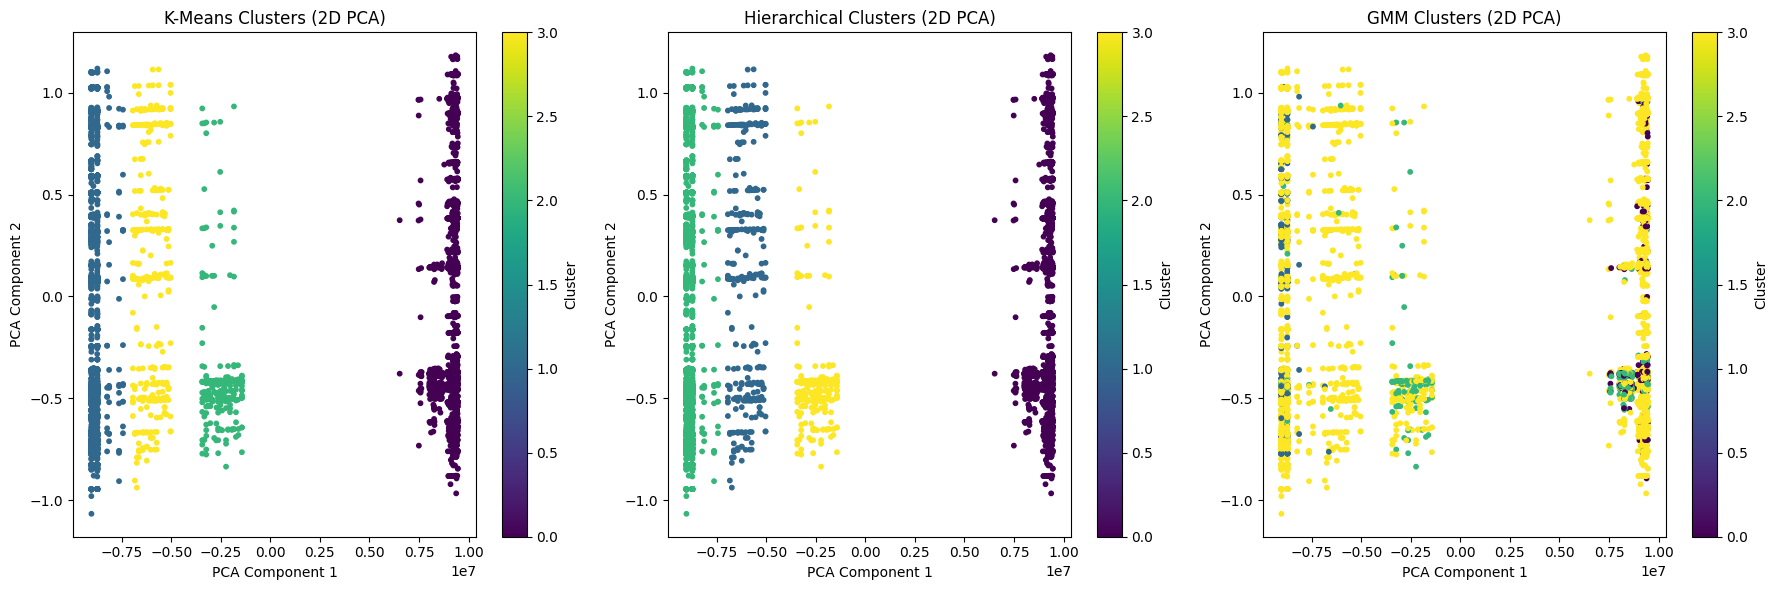

In [23]:
# Applying PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# Ploting results
models = {
    "K-Means":kmeans_labels ,
    "Hierarchical": hierarchical_labels,
    "GMM": gmm_labels
}

plt.figure(figsize=(18, 6))
for i, (name, labels) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)
    plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', s=10)
    plt.colorbar(label='Cluster')
    plt.title(f'{name} Clusters (2D PCA)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()


In [24]:
data['Cluster'] = kmeans_labels  # Adding the cluster labels


In [25]:
data['Cluster'].value_counts()

Cluster
0    4500
1    4338
2     367
3     356
Name: count, dtype: int64

**Saving the Final Clustered Data**

In [26]:
data.to_csv('clustered_restaurants.csv', index=False)


In [28]:

from IPython.display import FileLink

# Create a download link
FileLink("clustered_restaurants.csv")

d:\GUVI Projects\ChefMate\clustered_restaurants.csv

In [29]:
data.head()

,restaurant.id,Afghani,African,American,Andhra,Arabian,Argentine,Armenian,Asian,Asian Fusion,...,Tex-Mex,Thai,Tibetan,Turkish,Turkish Pizza,Vegetarian,Vietnamese,Western,World Cuisine,Cluster
0,308322.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,18017612.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,18313566.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,18353121.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,18354483.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
